# Imported Liberaries

In [170]:
import pandas as pd
import os
import seaborn as sns
import numpy as np

In [171]:
path = r"C:\Users\ASUS\Desktop\Kaggle\Credit Card data"
print(list(os.walk(path)))

[('C:\\Users\\ASUS\\Desktop\\Kaggle\\Credit Card data', [], ['Credit_card.csv', 'Credit_card_label.csv'])]


In [172]:
for root, dir, files in os.walk(path):
    for file in files:
        print(os.path.join(root,file))

C:\Users\ASUS\Desktop\Kaggle\Credit Card data\Credit_card.csv
C:\Users\ASUS\Desktop\Kaggle\Credit Card data\Credit_card_label.csv


In [173]:
df=pd.read_csv(r'C:\Users\ASUS\Desktop\Kaggle\Credit Card data\Credit_card.csv')
label =pd.read_csv(r'C:\Users\ASUS\Desktop\Kaggle\Credit Card data\Credit_card_label.csv')

In [174]:
df.head(4)
label.head(4)

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1


In [175]:
df=pd.merge(df,label, on =['Ind_ID'] )
df.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


# Cleaning

In [176]:
df.info()
#YOU can see that in some columns data is missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [177]:
#lets remove irrelevant data first

col =['Ind_ID','Mobile_phone','Work_Phone','Phone','EMAIL_ID']
df=df.drop(columns=col)
df.head(5)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,NaN,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,NaN,2,1
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1


#  EDA

In [178]:
df['label'].value_counts()
#data is imbalanced, either upsample or under sample 
#(we prefer up sampling to prevent loss of data)

label
0    1373
1     175
Name: count, dtype: int64

In [179]:
df.describe()

,CHILDREN,Annual_income,Birthday_count,Employed_days,Family_Members,label
count,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.000000,1548.000000
mean,0.412791,1.913993e+05,-16040.342071,59364.689922,2.161499,0.113049
std,0.776691,1.132530e+05,4229.503202,137808.062701,0.947772,0.316755
min,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.000000,0.000000
25%,0.000000,1.215000e+05,-19553.000000,-3174.500000,2.000000,0.000000
50%,0.000000,1.665000e+05,-15661.500000,-1565.000000,2.000000,0.000000
75%,1.000000,2.250000e+05,-12417.000000,-431.750000,3.000000,0.000000
max,14.000000,1.575000e+06,-7705.000000,365243.000000,15.000000,1.000000


<Axes: >

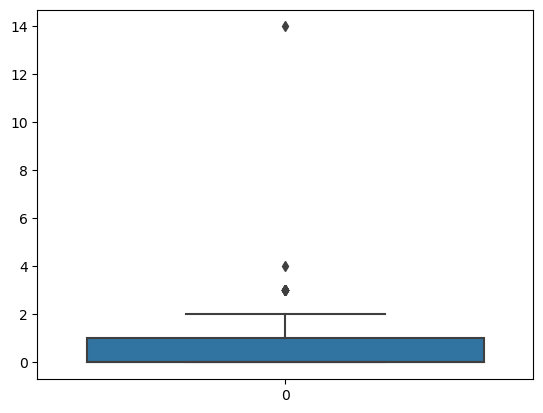

In [180]:
sns.boxplot(df['CHILDREN'])

In [181]:
mask = df[df['CHILDREN'] == 14].index
df = df.drop(mask, axis=0) # axis = 0 is index , axis = 1 is columns
df.describe()

,CHILDREN,Annual_income,Birthday_count,Employed_days,Family_Members,label
count,1547.000000,1.524000e+03,1525.000000,1547.000000,1547.000000,1547.000000
mean,0.404008,1.913773e+05,-16039.218361,59404.155785,2.153200,0.113122
std,0.695809,1.132869e+05,4230.662731,137843.873606,0.890038,0.316845
min,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.000000,0.000000
25%,0.000000,1.215000e+05,-19558.000000,-3176.000000,2.000000,0.000000
50%,0.000000,1.660500e+05,-15653.000000,-1563.000000,2.000000,0.000000
75%,1.000000,2.250000e+05,-12417.000000,-431.500000,3.000000,0.000000
max,4.000000,1.575000e+06,-7705.000000,365243.000000,6.000000,1.000000


In [182]:
#import missingno as msno

#msno.matrix(df)

df.isna().sum()

GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [183]:
df['Type_Occupation']= df['Type_Occupation'].fillna('unknown')
#df['GENDER']= df['GENDER'].loc([df['GENDER'],'GENDER'])
#df['GENDER'].mask(df['GENDER']=='Nan',None ,inplace =True)

<Axes: >

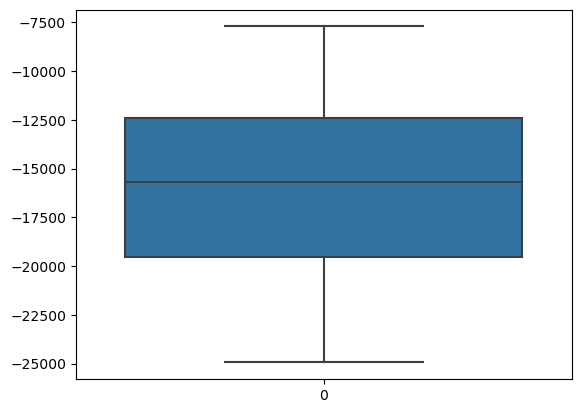

In [312]:
sns.boxplot(df['Birthday_count'])
#no values >0 hence data is correct

In [185]:
df=df.dropna(axis=0)

In [186]:
#msno.matrix(df)
df.isna().sum()

GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [187]:
df.shape

(1495, 14)

In [188]:

df.head(5)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,unknown,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,unknown,2,1
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,unknown,2,1
6,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,unknown,2,1
7,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,unknown,2,1


In [189]:
#df.head(5)
#df["Housing_type"].value_counts()
#df["Type_Income"].value_counts()
df["Birthday_count"].describe()

count     1495.000000
mean    -16035.043478
std       4227.687068
min     -24946.000000
25%     -19548.000000
50%     -15670.000000
75%     -12417.000000
max      -7705.000000
Name: Birthday_count, dtype: float64

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
X_train,X_test,Y_train,Y_test =train_test_split(df.drop(['label'],axis=1),df['label'],test_size=0.3,random_state=42)


# PreProcessing

In [314]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
#from imblearn.over_sampling import SMOTE

In [192]:

Processed = ColumnTransformer(transformers=[
            ('T1',OrdinalEncoder(categories=[
            ['House / apartment','Office apartment','Rented apartment','Office apartment','With parents','Co-op apartment','Municipal apartment'],
            ['Working','Commercial associate','State servant','Pensioner']],dtype=int),['Housing_type','Type_Income']),
            ('T2',OrdinalEncoder(),['Type_Occupation', 'EDUCATION']),
            ('T3',OneHotEncoder(sparse_output = False,handle_unknown='ignore',drop='first'),['GENDER', 'Car_Owner', 'Propert_Owner','Marital_status']),
            ('T4',StandardScaler(),['Employed_days','Birthday_count','Annual_income'])                                 
            ],remainder='passthrough' )                             
                                            
                                            

In [26]:
# Processed.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('T1',
                                 OrdinalEncoder(categories=[['House / '
                                                             'apartment',
                                                             'Office apartment',
                                                             'Rented apartment',
                                                             'Office apartment',
                                                             'With parents',
                                                             'Co-op apartment',
                                                             'Municipal '
                                                             'apartment'],
                                                            ['Working',
                                                             'Commercial '
                                                             'associate',
                                                             'State servant',
                                                             'Pensioner']],
                                                dtype=<class 'int'>),
                                 ['Housing_type', 'Type_Income']),
                                ('T2', OrdinalEncoder(),
                                 ['Type_Occupation', 'EDUCATION']),
                                ('T3',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['GENDER', 'Car_Owner', 'Propert_Owner',
                                  'Marital_status']),
                                ('T4', StandardScaler(),
                                 ['Employed_days', 'Birthday_count',
                                  'Annual_income'])])

In [206]:
#X_train_Processed=pd.DataFrame(Processed.transform(X_train))

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,label
528,M,N,Y,0,225000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10570.0,-1175,Managers,2,0
1072,M,Y,Y,0,121500.0,Pensioner,Higher education,Married,House / apartment,-24261.0,365243,unknown,2,0
514,F,Y,Y,0,225000.0,Working,Higher education,Single / not married,House / apartment,-9688.0,-593,unknown,1,0
521,F,N,Y,0,144000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23334.0,365243,unknown,2,0
1235,F,N,N,0,292500.0,State servant,Secondary / secondary special,Married,House / apartment,-20953.0,-8684,Accountants,2,0


# Upsampling

In [204]:
from sklearn.utils import resample
df_train = pd.concat([X_train,Y_train], axis=1 ,ignore_index=False)
df_majority = df_train[df_train['label']==0]
df_minority= df_train[df_train['label']==1]
upsampled = resample(df_minority, replace =True ,n_samples=925)
df_train=pd.concat([df_majority,upsampled],axis=0,ignore_index=False)
X_train_resampled =df_train.iloc[ : , 0:-1]
Y_train_resampled=df_train.iloc[ : ,-1]

In [207]:
X_train_resampled.shape


(1850, 13)

In [208]:
from sklearn.pipeline import Pipeline
p = Pipeline([
    ('preprocessing',Processed)
    ])

In [233]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [245]:
models = [RandomForestClassifier(),GradientBoostingClassifier(),
          DecisionTreeClassifier(),KNeighborsClassifier(),
         GaussianNB(), LogisticRegression(max_iter=1000)]


In [240]:
X_train_Preprocessed= p.fit_transform(X_train_resampled)
X_test_Preprocessed=p.fit_transform(X_test)
    

In [246]:

import time

Name = []
Accuracy = []
R2_Score=[]
Recall=[]
Precistion=[]
Time_Taken = []

for model in models:
    Name.append(type(model).__name__)
    begin = time.time()
    model.fit(X_train_Preprocessed,Y_train_resampled)
    Y_pred = model.predict(X_test_Preprocessed)
    end = time.time()
    accuracyScore = accuracy_score(Y_pred, Y_test)
    Accuracy.append(accuracyScore)
    Time_Taken.append(end-begin)
    
    
# make dataframe to see accuracy for each model
Dict = {'Name':Name,'Accuracy':Accuracy,'Time Taken':Time_Taken}
model_df = pd.DataFrame(Dict)
model_df

,Name,Accuracy,Time Taken
0,RandomForestClassifier,0.906459,0.540822
1,GradientBoostingClassifier,0.857461,0.543791
2,DecisionTreeClassifier,0.897550,0.014094
3,KNeighborsClassifier,0.743875,0.134640
4,GaussianNB,0.694878,0.004987
5,LogisticRegression,0.665924,0.055974


# RANDOM FOREST IS THE BEST WITH ACCURACY >90%

In [302]:
from sklearn import metrics
model = RandomForestClassifier()
model.fit(X_train_Preprocessed, Y_train_resampled)
Y_pred = model.predict(X_test_Preprocessed)
report = classification_report(Y_test, Y_pred,output_dict=True)


In [308]:
z= pd.DataFrame(report).transpose()
z.head()

,precision,recall,f1-score,support
0,0.922374,0.985366,0.952830,410.000000
1,0.454545,0.128205,0.200000,39.000000
accuracy,0.910913,0.910913,0.910913,0.910913
macro avg,0.688460,0.556785,0.576415,449.000000
weighted avg,0.881739,0.910913,0.887440,449.000000


In [310]:
from seaborn import barplot as sp

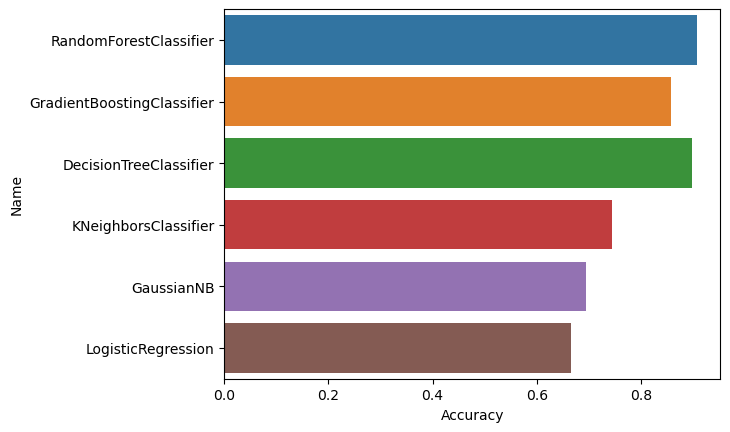

In [311]:

ax=sp(data =model_df ,y="Name" ,x="Accuracy")
